# Chapter 8 : 신경망·딥러닝의 응용(필기체 숫자 인식)

MNIST 데이터셋을 이용하여 28x28 그레이스케일 이미지를 피드포워드 네트워크에 인식시키기

MNIST : 60,000개 학습용 데이터, 10,000개의 테스트용 데이터를 가지며 28X28 그레이스케일 이미지이며 각 픽셀은 0 ~ 255의 값을 가진다. 각 정답값(라벨값)은 0 ~ 9의 값을 가진다.

## 8.1 MNIST 데이터베이스


In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

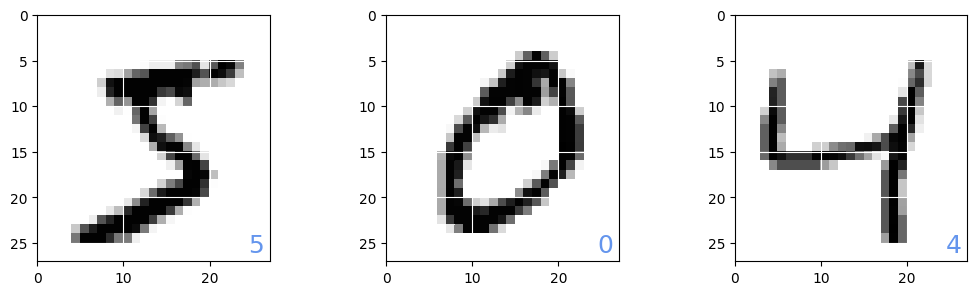

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2)) #그래프 가로세로 비율 설정
plt.subplots_adjust(wspace=0.5) #서브플롯 위치 조정 : 이 때는 양옆 비율
plt.gray()
for id in range(3):
  plt.subplot(1, 3, id+1) #행개수, 열개수, 몇번째인지 위치를 알려줌
  img = x_train[id, :, :] #이미지 가져오기
  plt.pcolor(255-img) #색 반전
  plt.text(24.5, 26, "%d" % y_train[id],
           color='cornflowerblue', fontsize=18) #오른쪽 아래에 라벨값 표시
  plt.xlim(0,27) #각 subplot의 범위 설정
  plt.ylim(27,0)
  plt.grid('on', color='white') #각 범위마다 흰색 격자를 표시
plt.show()

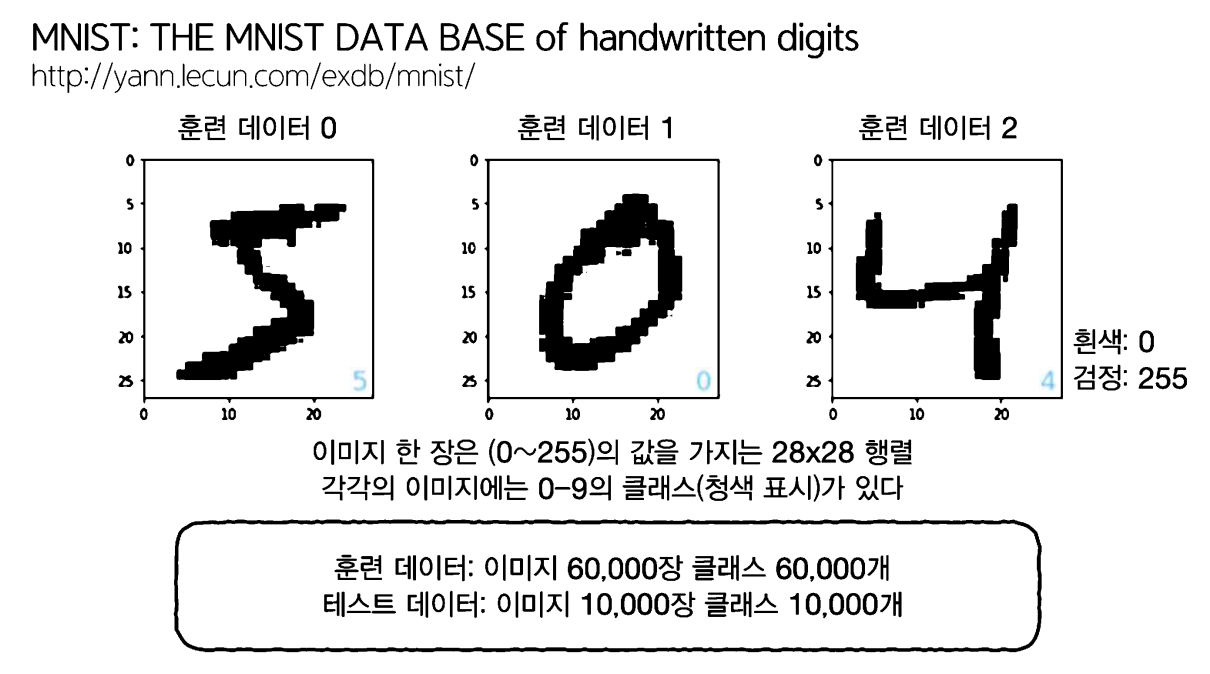

## 8.2 2층 피드 포워드 네트워크 모델

7장에서 다룬 2층 피드 포워드 네트워크 모델을 사용해 분류 문제가 해결되는지 살펴보자

In [ ]:
from keras.utils import to_categorical

#x_train = x_train.reshape(60000, 784).astype('float32') 이렇게도 사용 가능
x_train = x_train.reshape(60000, 784) # 28X28의 이미지 데이터를 784길이의 벡터로 처리
x_train = x_train.astype('float32') # 0~1의 실수형으로 변환
x_train = x_train / 255
num_classes = 10
y_train = to_categorical(y_train, num_classes) # 0~9까지의 정수이며, 1-of-K부호화법으로 변경
                                                        # 1-of-K 부호화법 : 범주형 데이터를 이진벡터로 변환한다(정답값은 1, 나머지는 0으로 이진벡터형식)
                                                        # 답이 0일 경우 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                                                        # 답이 5일 경우 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

#testset도 마찬가지로 만든다.
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes)

데이터를 사용하기 쉬운 형태로 변경하고 이제 네트워크 모델을 생각해보자

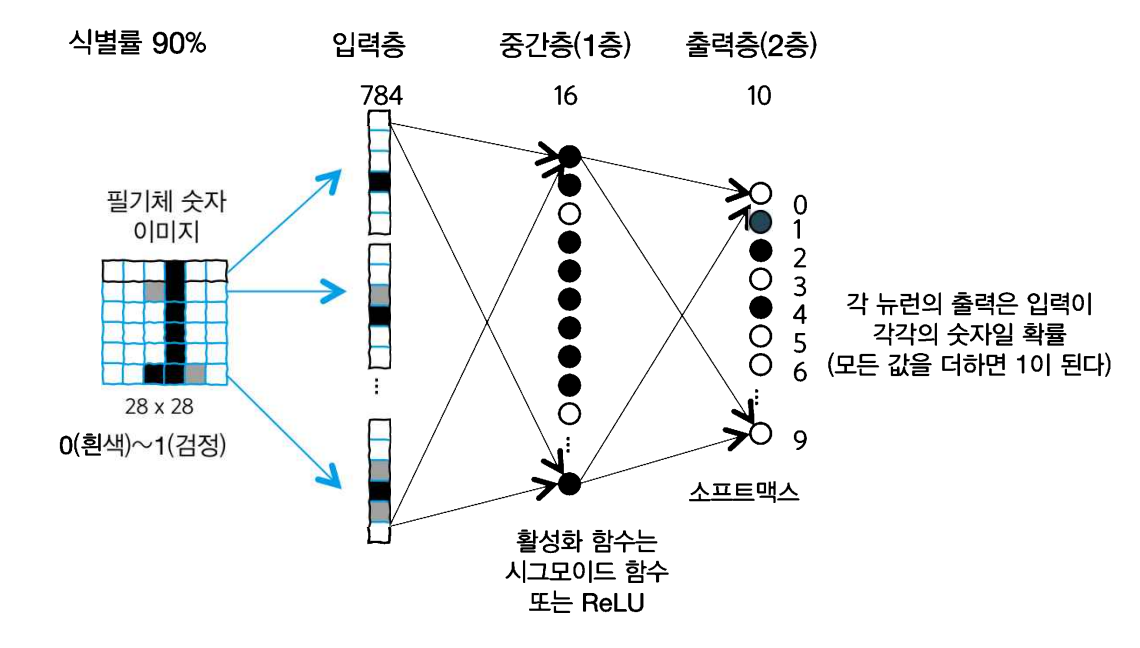

In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

#모델 구현
model = Sequential()
model.add(Dense(16, input_dim=784, activation='sigmoid')) #FC(완전연결층)=Dense, 16개의 뉴런을 이용하여 입력합계를 구하고 sigmoid함수 처리 후 출력함
model.add(Dense(10, activation='softmax')) # softmax함수를 사용한 10개의 출력을 반환하는 FC 모델 구현
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy']) # loss함수, optimizer를 설정한 후 평가 지표를 '정확도'로 측정

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs = 10, batch_size = 1000, # fit은 각종 정보를 넣고 모델을 epoch수 만큼 학습 시킵니다
                    verbose = 1, validation_data = (x_test, y_test)) # verbose는 학습시 발생하는 정보를 처리하는 방법입니다. 0=출력x, 1=상세히 출력, 2=간략히 출력
score = model.evaluate(x_test, y_test, verbose = 0) # evaluate는 테스트 데이터에 대한 모델을 평가 데이터로 평가합니다.
print('Test loss :', score[0])
print('Test accuracy :', score[1])
print("Computation time : {0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2780 - loss: 2.1564 - val_accuracy: 0.6648 - val_loss: 1.6765
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6977 - loss: 1.5904 - val_accuracy: 0.7636 - val_loss: 1.3391
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7689 - loss: 1.2859 - val_accuracy: 0.8219 - val_loss: 1.1067
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8167 - loss: 1.0707 - val_accuracy: 0.8532 - val_loss: 0.9333
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8472 - loss: 0.9104 - val_accuracy: 0.8697 - val_loss: 0.8038
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8618 - loss: 0.7869 - val_accuracy: 0.8796 - val_loss: 0.7069
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8731 - loss: 0.6997 - val_accuracy: 0.8883 - val_loss: 0.6333
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8792 - loss: 0.6311 - val_accuracy: 0.8943 - val_loss

stochastic gradient descent는 batch사이즈 개수씩 데이터를 뽑아 학습시키는 방법으로 실제 계산된 기울기 방향과는 다르다는 특징이 있다. 노이즈의 영향을 받아 휘청거리며 서서히 오차가 낮은 방향으로 나가갑니다.

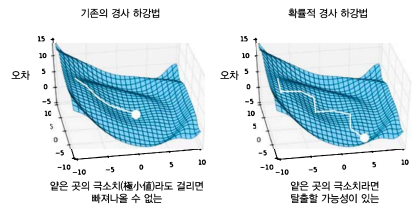

휘청거리는 효과 때문에 국소해(local minimum)을 빠져나갈 수 있는 성질이 있습니다.

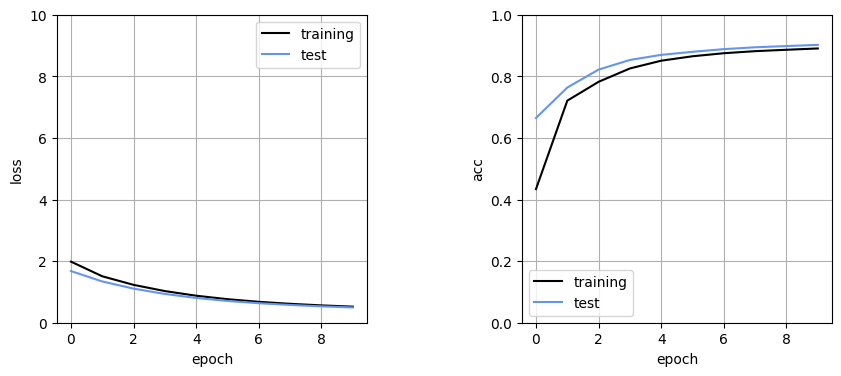

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

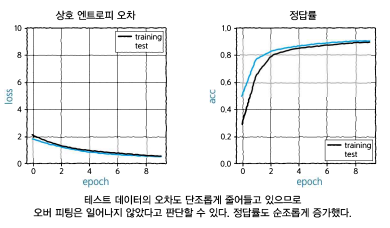

훈련 중에 훈련 데이터와 테스트 데이터의 차이가 크게 나타나지 않으므로 오버피팅은 일어나지 않았다고 볼 수 있다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


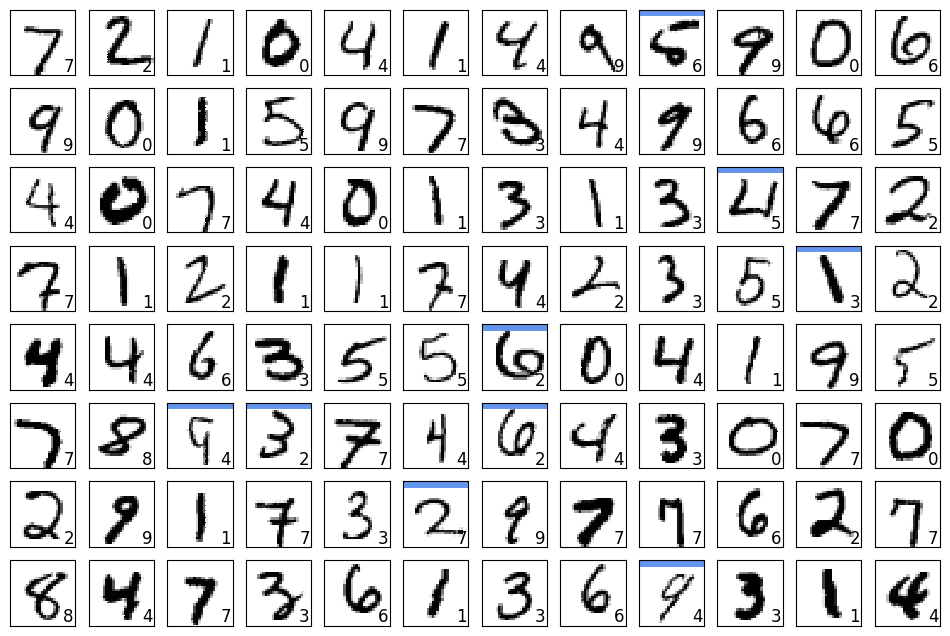

In [ ]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- 메인
show_prediction()
plt.show()

모델의 성능을 직접 보고 90퍼센트의 정확도는 그다지 정확하지 않다고 판단했다.

## 8.3 ReLU 활성화 함수

기존의 활성화 함수 Sigmoid는 입력의 변화가 출력에 반영되기 어렵고 gradient vanishing문제가 존재하기 때문에 ReLU함수를 사용하여 학습의 정체 문제를 해결하고 계산을 빠르게 할 수 있다.

위에 있는 모델에서 활성화 함수만 sigmoid에서 relu로 변경한 코드를 작성해보자

In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import time

#모델 구현
model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, epochs = 10, batch_size = 1000,
                    verbose = 1, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])
print("Computation time : {0:.3f} sec".format(time.time() - startTime))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3775 - loss: 1.8842 - val_accuracy: 0.7981 - val_loss: 0.8742
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8219 - loss: 0.7641 - val_accuracy: 0.8740 - val_loss: 0.5159
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8767 - loss: 0.4930 - val_accuracy: 0.8957 - val_loss: 0.4031
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8937 - loss: 0.4012 - val_accuracy: 0.9077 - val_loss: 0.3501
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9045 - loss: 0.3528 - val_accuracy: 0.9133 - val_loss: 0.3205
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9143 - loss: 0.3173 - val_accuracy: 0.9197 - val_loss: 0.3000
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9156 - loss: 0.3030 - val_accuracy: 0.9216 - val_loss: 0.2871
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9194 - loss: 0.2903 - val_accuracy: 0.9244 - val_los

시그모이드 함수를 사용했을 떄보다 약 3% 정확도가 올랐습니다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


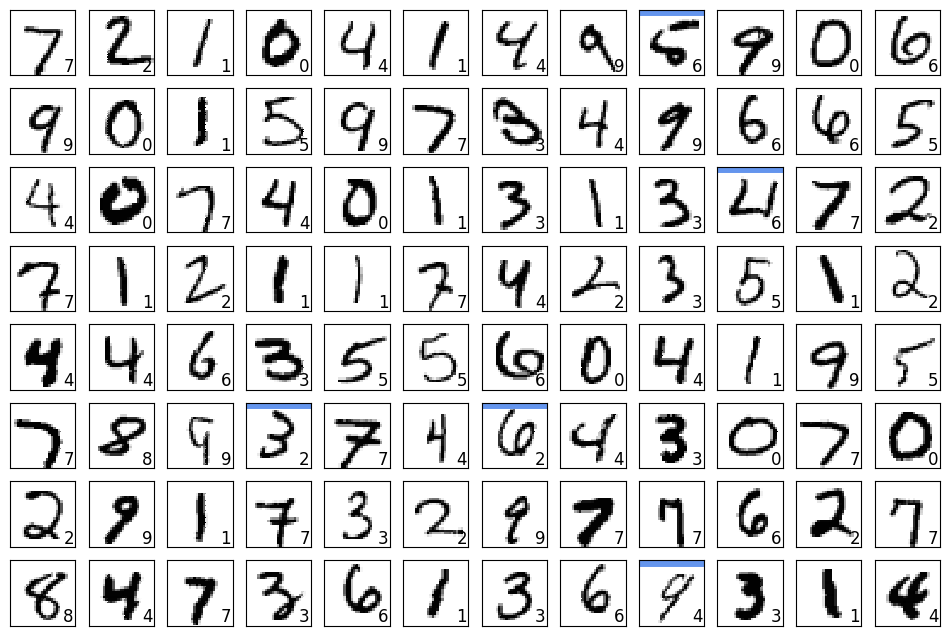

In [ ]:
show_prediction()
plt.show()

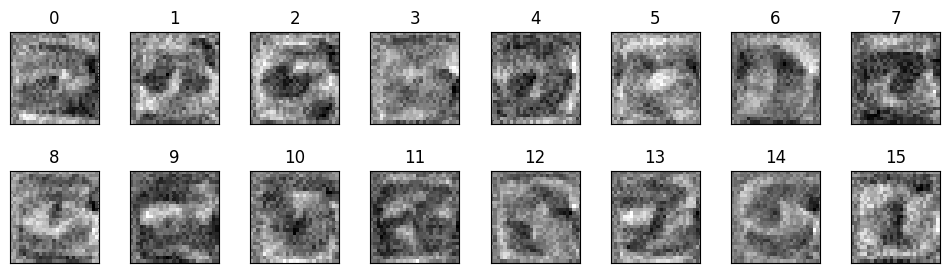

In [ ]:
#1층째의 가중치 시각화

w = model.layers[0].get_weights()[0] #네트워크 모델의 중간층 가중치 매개변수를 얻기(model.layers[0].get_weights()[1] = 중간층의 바이어스 매개변수, model.layers[1].get_weights()[0] = 출력층의 가중치 매개변수)
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

가중치 값이 양수이면 검은색, 음수이면 흰색으로 표시합니다

하지만 이 모델은 2차원 이미지라는 공간 정보를 사용하지 않으므로 입력 순서를 바꾸더라도 동일한 정밀도로 학습이 가능하다. -> 네트워크 구조가 전결합형이며 모든 입력 성분은 대등한 관계이기 때문입니다.

## 8.4 공간 필터

합성곱 연산 : 2차원 행렬로 표현되는 공간 필터를 통해 이미지의 일부분과 필터 요소를 곱한 합을 이미지를 슬라이드시키면서 이미지의 전 영역에서 구하는 방식

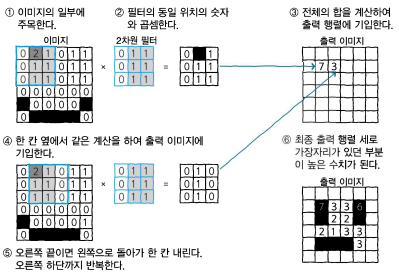



In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1) #2차원의 특성에 맞게 784가 아닌 28, 28로 나타냄
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

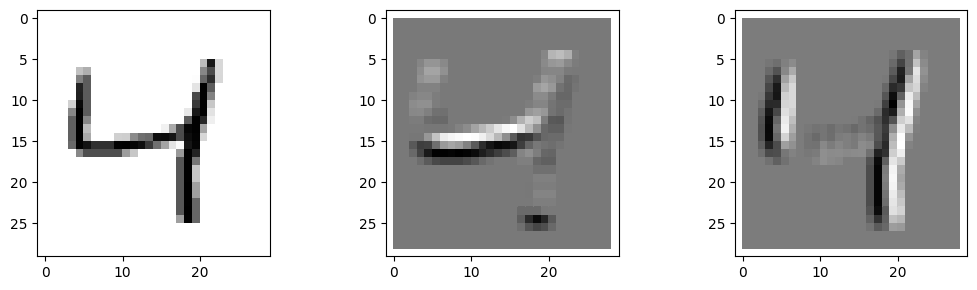

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) # (A) 가로의 특성을 강조하는 필터
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) # (B) 세로의 특성을 강조하는 필터


x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil2.reshape(-1))


# - 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

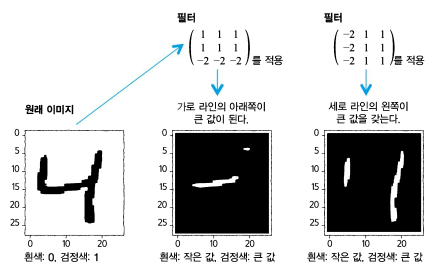

예제로 가로, 세로의 엣지를 강조하는 필터를 시험했지만 엣지 강조, 이미지 스무딩, 세부 부분 강조 등 다양한 처리가 가능하다

또한 필터를 적용하면 출력 이미지의 크기는 작아지는데 대응책으로 패딩이라는 방법도 있다.

## 8.5 합성곱 신경망

CNN이라도고 불리며 다양한 이미지 처리를 하는 필터 자체를 학습시키는 방식

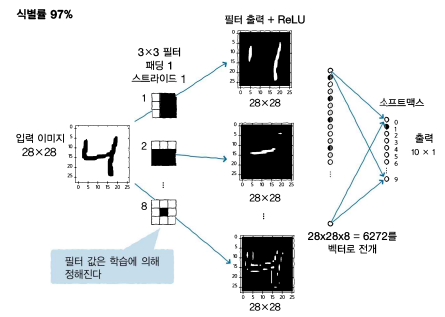

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

#합성곱층의 출력 : '배치 수, 필터 수, 출력이미지의 세로, 출력이미지의 가로'
model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', # padding은 출력 크기가 변하지 않도록 패딩을 추가해 처리한다는 뜻
                 input_shape=(28, 28, 1), activation='relu')) # (A) 입력 이미지의 크기 28, 28, 1(흑백이라 1, 컬러면 3으로 바꿔줘야 한다.)
model.add(Flatten()) # (B) 다음 Dense층에 넣기 위해 합성곱층의 출력을 '배치 수, 필터 수 x 출력 이미지 세로폭 x 출력 이미지 가로 폭'으로 바꿔줘야 함
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - accuracy: 0.6950 - loss: 1.2745 - val_accuracy: 0.9030 - val_loss: 0.3463
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.9044 - loss: 0.3345 - val_accuracy: 0.9223 - val_loss: 0.2723
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.9191 - loss: 0.2816 - val_accuracy: 0.9343 - val_loss: 0.2375
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 160ms/step - accuracy: 0.9325 - loss: 0.2372 - val_accuracy: 0.9400 - val_loss: 0.2110
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.9407 - loss: 0.2073 - val_accuracy: 0.9457 - val_loss: 0.1902
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.9467 - loss: 0.1850 - val_accuracy: 0.9507 - val_loss: 0.1752
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - accuracy: 0.9515 - loss: 0.1676 - val_accuracy: 0.9545 - val_loss: 0.1573
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.9601 - loss: 0.1439 - val_accu

In [ ]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


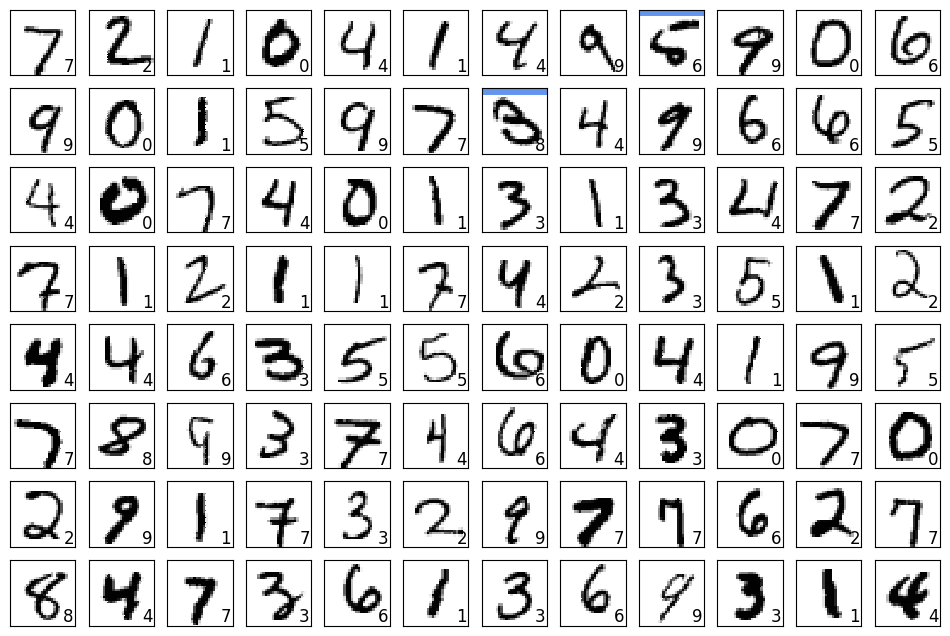

In [ ]:
show_prediction()
plt.show()

이미지 인식 성능이 많이 좋아진 것을 알 수 있다.

이 때 학습에서 획득한 8장의 필터를 코드를 통해 얻어보고 예시 하나를 가져와 각 필터를 적용한 결과를 나타내보았다. 이를 통해 각 필터들의 특징에 대해서 알 수 있다. 이러한 CNN네트워크는 필기체 숫자 뿐 아닌 그림 인식 등 다양한 이미지 처리에 사용된다.

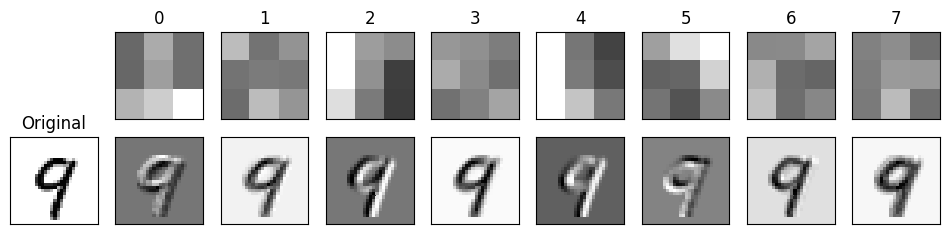

In [ ]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")


w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

## 8.6 풀링

1픽셀만 어긋난 위치를 입력해도 배열의 수치가 달라진다. 이러한 문제를 풀링 처리를 통해 이미지 위치에 대한 견고성을 지킬 수 있다.

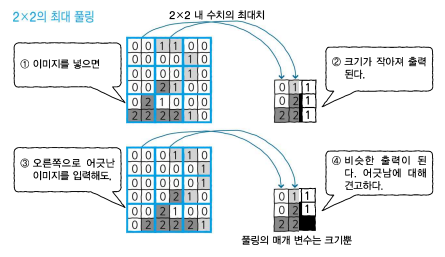

이렇게 얻은 출력 이미지는 입력 이미지가 가로세로로 살짝 어긋나도 변하지 않는 성질을 갖고 비슷한 출력을 반환할 수 있다.

또한 최대 풀링 외에 평균 풀링이나 필터 크기(2X2, 3X3, 4X4 등), 스트라이드(슬라이딩 픽셀 크기)도 임의로 정할 수 있다.

## 8.7 드롭아웃

드롭아웃 : 입력층 유닛과 중간층 뉴런을 확률 p(p < 1)로 임의로 선택하여 나머지를 무효화하고 무효화된 뉴런은 존재하지 않는 것으로 하여 학습을 갱신하는 방법. 미니 배치마다 뉴런을 뽑아 이 절차를 반복함

학습 후 예측하는 경우 모든 뉴런이 사용되는데 p의 비율의 뉴런밖에 존재하지 않는 상태에서 학습하고 있었는데 예측 시에 전체 참가가 되면 출력이 커짐(1/p배). 그래서 예측 시에는 드롭아웃을 한 층의 출력 대상의 가중치를 p배를 하여 작게 설정해 계산을 맞춥니다.

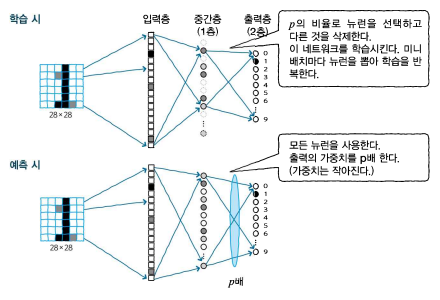

## 8.8 MNIST 인식 네트워크 모델

합성곱 네트워크에 풀링과 드롭아웃을 도입한 네트워크를 마지막으로 구성해보자.

전체 네트워크 구조

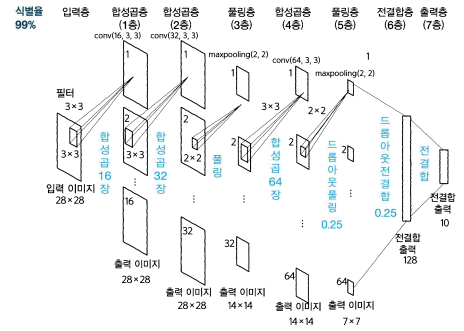

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3),
                 input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B)
model.add(Dropout(0.25)) # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # (D)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.5836 - loss: 1.3528 - val_accuracy: 0.9587 - val_loss: 0.1405
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9486 - loss: 0.1682 - val_accuracy: 0.9817 - val_loss: 0.0639
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9703 - loss: 0.0972 - val_accuracy: 0.9846 - val_loss: 0.0466
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9788 - loss: 0.0694 - val_accuracy: 0.9876 - val_loss: 0.0383
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9825 - loss: 0.0576 - val_accuracy: 0.9887 - val_loss: 0.0330
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9839 - loss: 0.0527 - val_accuracy: 0.9893 - val_loss: 0.0322
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9868 - loss: 0.0408 - val_accuracy: 0.9902 - val_loss: 0.0278
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9876 - loss: 0.0397 - val_accuracy: 0.9910 - val_l

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


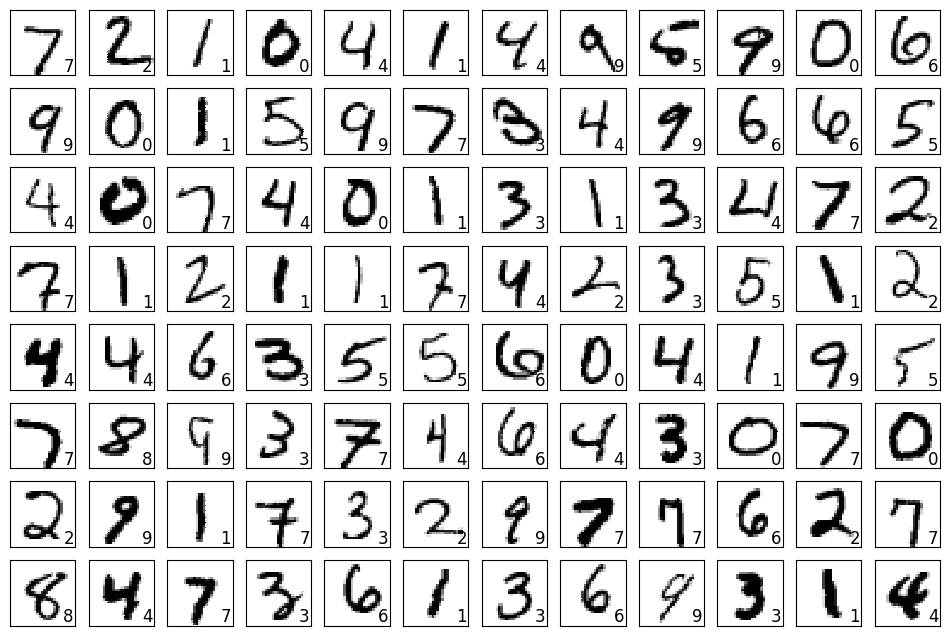

In [ ]:
show_prediction()
plt.show()

위의 결과보다 더 좋은 결과를 얻은 것을 알 수 있다.

MNIST 데이터보다 더 큰 크기의 자연어 이미지를 처리하거나 많은 카테고리를 다루는 경우에는 층의 심층화, 합성곱, 풀링, 드롭아웃의 효과가 더욱 강력하게 발휘될 것 입니다.